<a id='top'></a>


<a href=#inspect_data>Inspect Data</a>  

<a href=#logreg>Logistic Regression</a>

<a href=#subset>Subset Data</a>

<a href=#summary>Summary Statistics</a>

<a href=#subsetII>Subset for Summary Stats</a>

<a href=#bottom>Bottom</a>


In [50]:
# Ignore 'dask' warning

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# Setting up constants. All required
project = 'graydon-moving-indicator'
bucket_name = 'graydon-data'

In [3]:
# Initializing bucket
fs = gcsfs.GCSFileSystem(project='graydon-moving-indicator')
gcs = storage.Client()
bucket = gcs.get_bucket(bucket_name)

In [4]:
selected_columns = ['date_month', 'id_company', 'id_branch',
       'is_discontinued',
       'financial_calamity_outcome',
       'qty_employees', 'year_qty_employees', 'id_company_creditproxy',
       'score_payment_assessment', 'amt_revenue',
       'year_revenue', 'amt_consolidated_revenue', 'year_consolidated_revenue',
       'amt_consolidated_operating_result',
       'year_consolidated_operating_result', 
       'perc_credit_limit_adjustment', 'color_credit_status', 'rat_pd',
       'score_pd','has_increased_risk',
       'is_sole_proprietor', 'code_SBI_2', 'code_SBI_1',
       'qty_address_mutations_total',
       'qty_address_mutations_month', 
       'has_relocated',
       'has_name_change',  'Vice President'
       ]

In [5]:
selected_columns_small = ['date_month', 'id_company', 'id_branch', 'date_established',
       'is_discontinued',
       'financial_calamity_outcome',
       'qty_employees', 'year_qty_employees', 'id_company_creditproxy',
       'score_payment_assessment', 'amt_revenue',
       'year_revenue', 'amt_consolidated_revenue', 'year_consolidated_revenue',
       'perc_credit_limit_adjustment', 'color_credit_status', 'rat_pd',
       'score_pd','has_increased_risk',
       'is_sole_proprietor', 'code_SBI_2', 'code_SBI_1', 'qty_address_mutations_total',
       'qty_address_mutations_month', 'has_relocated',
        'has_name_change'
       ]

In [6]:

def read_one_year_from_bucket_merged_csv(year, dir_prefix = ''):
    """ Reads a whole year of data from the already merged files """
    full_year_df = pd.DataFrame()
    print('Starting with year: ', year)
    print(dir_prefix)
    blob_list = list(bucket.list_blobs(prefix=dir_prefix))    
    for blob in blob_list:  
        print("blob", blob.name)
        if year in blob.name:
            print('Processing file: ', blob.name)
            with fs.open('graydon-data/' + blob.name) as f:
                full_year_df = pd.read_csv(f, sep=',', index_col=0)   
        print('The number of rows so far is: ', full_year_df.shape[0])
    return full_year_df

In [7]:
def clean_data_per_year(df):
    df['date_month'] = pd.to_datetime(df['date_month'])
    df['financial_calamity_outcome'] = df['financial_calamity_outcome'].fillna(-1) 
    df['qty_employees'] = df['qty_employees'].str.strip() 
    df.loc[df.qty_employees == 'NA', 'qty_employees'] = 0
    df['qty_employees'] = df['qty_employees'].fillna(0) 
    df['qty_employees'] = df['qty_employees'].astype(str).astype(int)
    df['year_qty_employees'] = df['year_qty_employees'].str.strip()
    df.loc[df.year_qty_employees == 'NA', 'year_qty_employees'] = None
    df['amt_revenue'] = df['amt_revenue'].str.strip() 
    df.loc[df.amt_revenue == 'NA', 'amt_revenue'] = 0
    df['amt_revenue'] = df['amt_revenue'].astype(str).str.replace(',','.').astype(float)
    df['year_revenue'] = df['year_revenue'].str.strip() 
    df.loc[df.year_revenue == 'NA', 'year_revenue'] = 0
    df['amt_consolidated_revenue'] = df['amt_consolidated_revenue'].str.strip() 
    df.loc[df.amt_consolidated_revenue == 'NA', 'amt_consolidated_revenue'] = 0
    df['amt_consolidated_revenue'] = df['amt_consolidated_revenue'].astype(str).str.replace(',','.').astype(float)
    df['year_consolidated_revenue'] = df['year_consolidated_revenue'].str.strip() 
    df.loc[df.year_consolidated_revenue == 'NA', 'year_consolidated_revenue'] = 0
    df['amt_consolidated_operating_result'] = df['amt_consolidated_operating_result'].str.strip() 
    df.loc[df.amt_consolidated_operating_result == 'NA', 'amt_consolidated_operating_result'] = 0
    df['amt_consolidated_operating_result'] = df['amt_consolidated_operating_result'].astype(str).str.replace(',','.').astype(float)
    df['year_consolidated_operating_result'] = df['year_consolidated_operating_result'].str.strip() 
    df.loc[df.year_consolidated_operating_result == 'NA', 'year_consolidated_operating_result'] = 0
    df['score_pd'] = df['score_pd'].str.strip() 
    df.loc[df.score_pd == 'NA', 'score_pd'] = 0
    df['score_pd'] = df['score_pd'].astype(str).str.replace(',','.').astype(float)
    df['has_increased_risk'] = df['has_increased_risk'].astype(bool)
    df.loc[df.has_increased_risk == None, 'has_increased_risk'] = False
    df.loc[df.code_sbi_2.isnull(), 'code_sbi_2'] = 0
    return df

In [8]:
def save_df_locally(df, dir_prefix, year, as_json= False):
    """ Saves df as json or csv locally on server """
    if as_json:        
        file_path = dir_prefix + '/' + year + '_merged.json'
        df.to_json(file_path)
    else:
        file_path =  dir_prefix + '/' + year + '_merged.csv'
        df.to_csv(file_path)
        

#### Read one full year from already merged files

In [9]:
one_year_df = read_one_year_from_bucket_merged_csv(dir_prefix= 'including_scores/merged_per_year', year = '2018')

Starting with year:  2018
including_scores/merged_per_year
blob including_scores/merged_per_year/
The number of rows so far is:  0
blob including_scores/merged_per_year/2016_merged.csv
The number of rows so far is:  0
blob including_scores/merged_per_year/2017_merged.csv
The number of rows so far is:  0
blob including_scores/merged_per_year/2018_merged.csv
Processing file:  including_scores/merged_per_year/2018_merged.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (8,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The number of rows so far is:  19311866


In [10]:
one_year_df = clean_data_per_year(one_year_df)

In [11]:
one_year_df.shape

(19311866, 28)

<a id='inspect_data'></a>

# Inspect Data:


<a href=#top>Top</a>

In [10]:
one_year_df.shape

(19311866, 29)

#### Preview df

In [114]:
HTML(DataFrame(one_year_df.head(5)).to_html())

,date_month,id_company,id_branch,is_discontinued,financial_calamity_outcome,qty_employees,year_qty_employees,id_company_creditproxy,score_payment_assessment,amt_revenue,year_revenue,amt_consolidated_revenue,year_consolidated_revenue,amt_consolidated_operating_result,year_consolidated_operating_result,perc_credit_limit_adjustment,color_credit_status,rat_pd,score_pd,has_increased_risk,is_sole_proprietor,code_sbi_2,code_sbi_1,qty_address_mutations_total,qty_address_mutations_month,has_relocated,has_name_change,vice_president
0,2018-01-01,3,10079408,False,-1.0,1,2018,3,20.0,3.552530e-316,2009,4.954293e-316,2015,2.346812e-318,2015,35,G,B,-4.950,False,False,64.0,NaN,0,0,False,False,0
1,2018-01-01,5,10079416,False,-1.0,9,2018,1064993,20.0,0.000000e+00,0,0.000000e+00,0,0.000000e+00,0,-5,G,A,-4.883,False,False,46.0,NaN,0,0,False,False,0
2,2018-01-01,6,10079424,False,-1.0,25,2014,6,24.0,4.446591e-317,2011,0.000000e+00,0,0.000000e+00,0,-100,R,D,0.000,True,False,41.0,NaN,0,0,False,False,0
3,2018-01-01,9,10079432,False,-1.0,45,2018,9,20.0,0.000000e+00,0,0.000000e+00,0,0.000000e+00,0,25,G,CCC,-4.990,False,False,47.0,NaN,0,0,False,False,0
4,2018-01-01,12,35,False,-1.0,5,2018,12,28.0,0.000000e+00,0,0.000000e+00,0,0.000000e+00,0,30,G,BBB,-5.071,False,False,64.0,NaN,0,0,False,False,0


In [115]:
one_year_df['has_relocated'].value_counts()

False    19212183
True        99683
Name: has_relocated, dtype: int64

In [116]:
one_year_df['has_relocated'].value_counts()/one_year_df.shape[0]

False    0.994838
True     0.005162
Name: has_relocated, dtype: float64

In [117]:
one_year_df['is_sole_proprietor'].value_counts()

False    19311866
Name: is_sole_proprietor, dtype: int64

In [16]:
one_year_df['id_company'].value_counts()

890460183    11682
927776979     8638
890279780     8017
80559         6771
324324        5440
420124        4920
891113940     4311
854287        3936
888945809     3840
568709        3817
905228146     3810
906052041     3780
901379883     3690
891751068     3580
903945681     3551
958872        3466
899033520     3398
101259        3247
913957208     3159
93178         3145
1001695       2975
911331255     2960
910623678     2842
263515        2840
898903777     2780
898109906     2726
893106836     2720
897515846     2710
294741        2690
906631580     2680
             ...  
919173578        1
943333229        1
943434955        1
943349605        1
894079107        1
943380316        1
943336716        1
943445884        1
943456622        1
705543           1
943382149        1
933630654        1
943322200        1
943423902        1
943462843        1
943379563        1
943349397        1
900111534        1
943385180        1
943404843        1
943220890        1
943468167   

In [18]:
one_year_df[one_year_df['id_company']==890460183][:3]

,Unnamed: 0,date_month,id_company,id_branch,is_discontinued,financial_calamity_outcome,qty_employees,year_qty_employees,id_company_creditproxy,score_payment_assessment,...,score_pd,has_increased_risk,is_sole_proprietor,code_sbi_2,code_sbi_1,qty_address_mutations_total,qty_address_mutations_month,has_relocated,has_name_change,vice_president
329587,414485,2018-01-01,890460183,15313182,False,NaN,4161,2018,926579789,20.0,...,"-5,044",False,False,64.0,NaN,0,0,False,False,0
329588,414486,2018-01-01,890460183,53883578,False,NaN,4161,2018,926579789,20.0,...,"-5,044",False,False,64.0,NaN,0,0,False,False,0
329589,414487,2018-01-01,890460183,54324688,False,NaN,4161,2018,926579789,20.0,...,"-5,044",False,False,64.0,NaN,0,0,False,False,0


In [118]:
one_year_df[one_year_df['id_company']==890460183]['score_payment_assessment'].describe()

count    11682.0
mean        20.0
std          0.0
min         20.0
25%         20.0
50%         20.0
75%         20.0
max         20.0
Name: score_payment_assessment, dtype: float64

In [119]:
one_year_df.dtypes

date_month                            datetime64[ns]
id_company                                     int64
id_branch                                      int64
is_discontinued                                 bool
financial_calamity_outcome                   float64
qty_employees                                  int64
year_qty_employees                            object
id_company_creditproxy                        object
score_payment_assessment                     float64
amt_revenue                                  float64
year_revenue                                  object
amt_consolidated_revenue                     float64
year_consolidated_revenue                     object
amt_consolidated_operating_result            float64
year_consolidated_operating_result            object
perc_credit_limit_adjustment                   int64
color_credit_status                           object
rat_pd                                        object
score_pd                                     f

In [120]:
type(one_year_df['qty_employees'])
#['has_relocated'].value_counts()

pandas.core.series.Series

In [121]:
one_year_df['qty_employees'].describe()

count    1.931187e+07
mean     9.924791e+01
std      2.133052e+03
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.133740e+05
Name: qty_employees, dtype: float64

In [122]:
one_year_df[one_year_df['qty_employees']>0]['qty_employees'].describe()

count    1.710552e+07
mean     1.120493e+02
std      2.266130e+03
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.133740e+05
Name: qty_employees, dtype: float64

In [123]:
one_year_df['score_pd'].describe()

count    1.931187e+07
mean    -3.410213e+00
std      2.455013e+00
min     -5.973000e+00
25%     -5.135000e+00
50%     -4.956000e+00
75%      0.000000e+00
max      2.929000e+00
Name: score_pd, dtype: float64

In [124]:
one_year_df['score_payment_assessment'].describe()

count    1.931187e+07
mean     2.340932e+01
std      6.548308e+00
min      0.000000e+00
25%      2.000000e+01
50%      2.800000e+01
75%      2.800000e+01
max      2.900000e+01
Name: score_payment_assessment, dtype: float64

In [133]:
one_year_df['code_sbi_1'].describe()

count     46909
unique        1
top           A
freq      46909
Name: code_sbi_1, dtype: object

In [134]:
one_year_df['code_sbi_2'].describe()

count    1.931187e+07
mean     6.540135e+01
std      2.193313e+01
min      0.000000e+00
25%      5.600000e+01
50%      6.400000e+01
75%      8.500000e+01
max      9.900000e+01
Name: code_sbi_2, dtype: float64

In [141]:
one_year_df['rat_pd'].describe()

count     19311866
unique          11
top            BBB
freq       2859179
Name: rat_pd, dtype: object

<a id='logreg'></a>
# Logistic Regression:

<a href=#top>Top</a>

In [142]:
feature_cols = ['score_pd', 'score_payment_assessment', 'code_sbi_2']

In [143]:
X = one_year_df[feature_cols]
y = one_year_df.has_relocated 

In [144]:
X.shape, y.shape

((19311866, 3), (19311866,))

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


NameError: name 'X' is not defined

In [127]:
logisticRegr = LogisticRegression()

In [146]:
logisticRegr.fit(x_train, y_train)

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
y_pred=logisticRegr.predict(x_test)

In [148]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4803037,       0],
       [  24930,       0]])

In [151]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logisticRegr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.9948


In [152]:
y_test.value_counts() / y_test.shape[0]

False    0.994836
True     0.005164
Name: has_relocated, dtype: float64

<a id='subset'></a>

# Subset Data

<a href=#top>Top</a>

In [13]:
one_year_df.shapee

(19311866, 28)

In [14]:
one_year_df[one_year_df['qty_employees']>1].shape

(5394770, 28)

In [15]:
one_year_df['qty_employees'].describe()

count    1.931187e+07
mean     9.924791e+01
std      2.133052e+03
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.133740e+05
Name: qty_employees, dtype: float64

In [65]:
mult_companies = one_year_df[one_year_df['qty_employees']>1]

In [66]:
mult_companies['has_relocated'].value_counts()

False    5371320
True       23450
Name: has_relocated, dtype: int64

In [157]:
mult_companies['has_relocated'].value_counts()/mult_companies.shape[0]

False    0.995653
True     0.004347
Name: has_relocated, dtype: float64

In [158]:
X = mult_companies[feature_cols]
y = mult_companies.has_relocated 

In [159]:
X.shape, y.shape

((5394770, 3), (5394770,))

In [160]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [161]:
logisticRegr.fit(x_train, y_train)

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
logisticRegr.fit(x_train, y_train)

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
y_pred=logisticRegr.predict(x_test)

In [163]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1342816,       0],
       [   5877,       0]])

In [164]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logisticRegr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.9956


In [165]:
y_test.value_counts() / y_test.shape[0]

False    0.995642
True     0.004358
Name: has_relocated, dtype: float64

<a id='summary'></a>
# Summary Statistics

<a href=#top>Top</a>

In [12]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns


In [13]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [14]:
mult_companies = one_year_df[one_year_df['qty_employees']>50]

In [16]:
mult_companies.shape

(753129, 28)

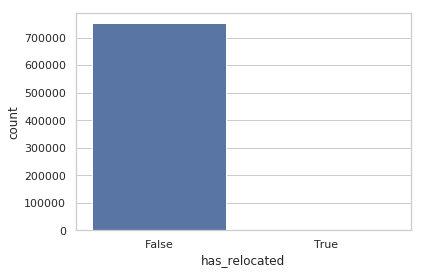

In [17]:
sns.countplot(x='has_relocated', data=mult_companies)
plt.show()

Text(0, 0.5, 'Frequency')

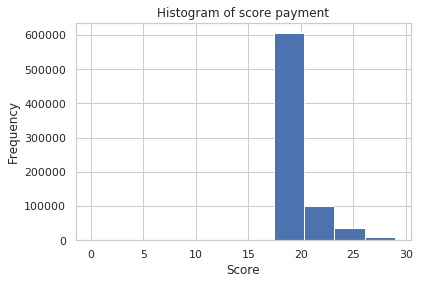

In [18]:
mult_companies.score_payment_assessment.hist()
plt.title('Histogram of score payment')
plt.xlabel('Score')
plt.ylabel('Frequency')

In [31]:
feature_cols = ['score_pd', 'score_payment_assessment', 'code_sbi_2']

In [32]:
subset_data = mult_companies[feature_cols]

score_pd
score_payment_assessment
code_sbi_2


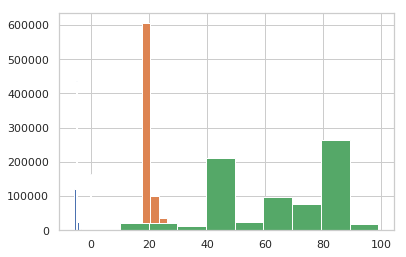

In [33]:
for cols in feature_cols:
    print(cols)
    mult_companies[cols].hist()
#     plt.title('Histogram of', cols)
#     plt.xlabel(cols)
#     plt.ylabel('Frequency')

In [27]:
subset_data = mult_companies[feature_cols][:1000]

In [30]:
mult_companies.dtypes

date_month                            datetime64[ns]
id_company                                     int64
id_branch                                      int64
is_discontinued                                 bool
financial_calamity_outcome                   float64
qty_employees                                  int64
year_qty_employees                            object
id_company_creditproxy                        object
score_payment_assessment                     float64
amt_revenue                                  float64
year_revenue                                  object
amt_consolidated_revenue                     float64
year_consolidated_revenue                     object
amt_consolidated_operating_result            float64
year_consolidated_operating_result            object
perc_credit_limit_adjustment                   int64
color_credit_status                           object
rat_pd                                        object
score_pd                                     f

In [46]:
feature_cols = ['score_pd', 'score_payment_assessment', 'code_sbi_2', 'qty_employees', 'qty_address_mutations_total']

### Remove qty_address_mutations_total

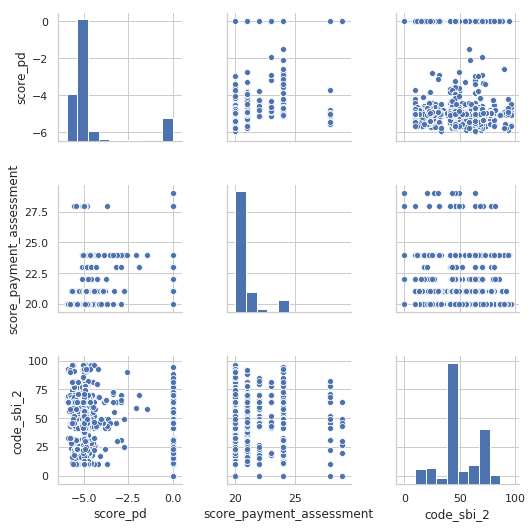

In [34]:
g = sns.pairplot(mult_companies[:10000], vars=feature_cols)

In [35]:
subset_large_companies = mult_companies.loc[mult_companies.qty_employees < 10000]

In [36]:
subset_large_companies['qty_employees'].describe()

count    719726.000000
mean       1055.173979
std        1642.505460
min          51.000000
25%         117.000000
50%         349.000000
75%        1200.000000
max        9721.000000
Name: qty_employees, dtype: float64

In [41]:
feature_cols = ['score_pd', 'score_payment_assessment', 'code_sbi_2', 'qty_employees']

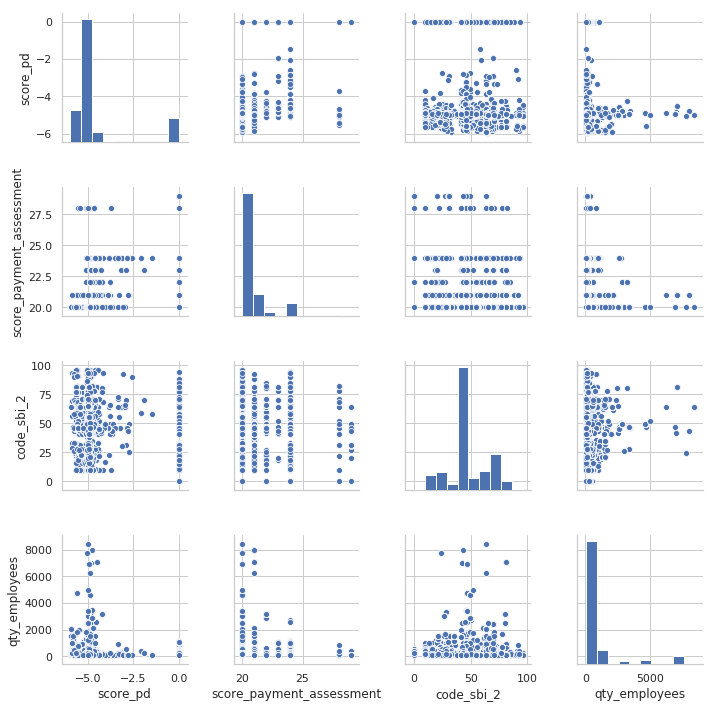

In [42]:
g = sns.pairplot(subset_large_companies[:10000], vars=feature_cols)

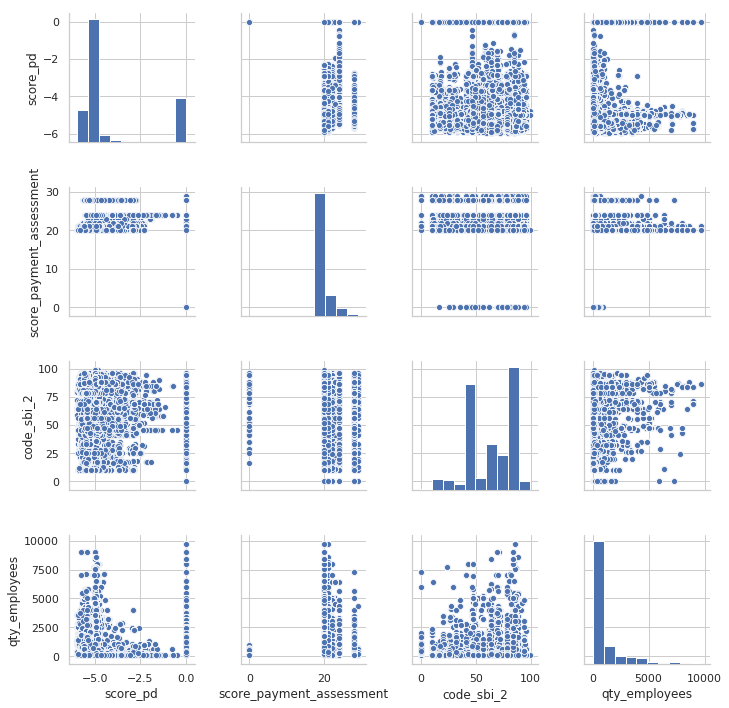

In [43]:
g = sns.pairplot(subset_large_companies, vars=feature_cols)

In [46]:
subset_large_companies.shape

(719726, 28)

In [45]:
subset_large_companies['has_relocated'].value_counts() / subset_large_companies.shape[0]

False    0.99862
True     0.00138
Name: has_relocated, dtype: float64

<a id='subsetII'></a>
# Subset for summary stats with relative fraction preserved

<a href=#top>Top</a>

In [67]:
subset_train, subset_test, y_train, y_test = train_test_split(mult_companies, mult_companies.has_relocated, test_size=0.75, random_state=0)

In [156]:
mult_companies['has_relocated'].value_counts()

False    5371320
True       23450
Name: has_relocated, dtype: int64

In [69]:
subset_train.shape

(1348692, 28)

In [70]:
subset_train.has_relocated.value_counts() / subset_train.shape[0]

False    0.995686
True     0.004314
Name: has_relocated, dtype: float64

In [71]:
mult_companies.has_relocated.value_counts() / mult_companies.shape[0]

False    0.995653
True     0.004347
Name: has_relocated, dtype: float64

In [73]:
all_cols = subset_train.columns

In [74]:
all_cols


Index(['date_month', 'id_company', 'id_branch', 'is_discontinued',
       'financial_calamity_outcome', 'qty_employees', 'year_qty_employees',
       'id_company_creditproxy', 'score_payment_assessment', 'amt_revenue',
       'year_revenue', 'amt_consolidated_revenue', 'year_consolidated_revenue',
       'amt_consolidated_operating_result',
       'year_consolidated_operating_result', 'perc_credit_limit_adjustment',
       'color_credit_status', 'rat_pd', 'score_pd', 'has_increased_risk',
       'is_sole_proprietor', 'code_sbi_2', 'code_sbi_1',
       'qty_address_mutations_total', 'qty_address_mutations_month',
       'has_relocated', 'has_name_change', 'vice_president'],
      dtype='object')

In [85]:
plot_cols = all_cols[4:6]

plot_cols

Index(['financial_calamity_outcome', 'qty_employees'], dtype='object')

financial_calamity_outcome


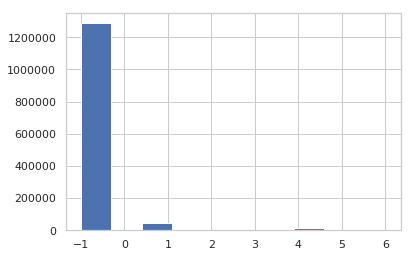

In [79]:
for cols in plot_cols[:2]:
    print(cols)
    subset_train[cols].hist()
#     plt.title('Histogram of', cols)
#     plt.xlabel(cols)
#     plt.ylabel('Frequency')

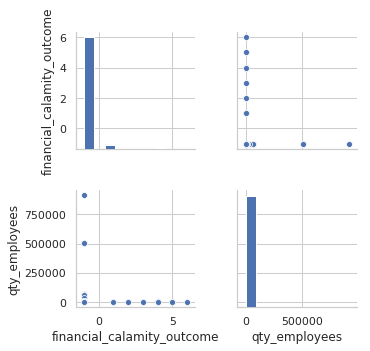

In [86]:
g = sns.pairplot(subset_train, vars=plot_cols)

<a id='bottom'></a>

<a href=#top>Top</a>

# Bottom